# Hausaufgabe 4

### Abgage via studip bis spätestens 05.06. 12:00 Uhr (zur VL)! 
### Verteidigung 08.06. 08:00-10:00 Uhr (Timeslots werden vorher bekannt gegeben)!


- In jedem Blatt kann maximal 5% Bonus erreicht werden, falls:
    - Mind. 60% des Arbeitsblatts korrekt bearbeitet wurde und
    - das Arbeitsblatt erfolgreich verteidigt (den Tutoren erklärt) wurde.
    - Bonus % = 5% * Teil der Hausaufgabe erfolgreich verteidigt
    - Erfolgreiche Verteidigung: Ein von uns ausgewähltes Team-Mitglied erklärt die Lösung und beantwortet Fragen dazu.
    - ChatGPT und andere Hilfsmittel dürfen verwendet werden, müssen aber zitiert werden.
    - Code muss ohne Hilfsmittel erläutert werden
- Wir bewerten nicht nur die Korrektheit der Ergebnisse, sondern auch ob der Code effizient, einfach zu verstehen, aufgeräumt und gut dokumentiert ist.

In [3]:
import pandas as pd

## Aufgabe 1: Pandas Basics (14%)

#### 1. (2%) Importieren Sie die csv-Datei "tips" von https://github.com/mwaskom/seaborn-data.

In [53]:
raw_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
tips = pd.read_csv(raw_url)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2. (2%) Wie viele Spalten und Zeilen hat dieser dataframe?

In [54]:
tips.shape

(244, 7)

#### 3. (2%) Was sind die Spalten des dataframe?

In [55]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### 4. (2%) Wie viele numerische und nicht-numerische Spalten enthält es?

In [56]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

#### 5. (2%) Wie hoch ist der durchschnittliche Betrag der Gesamtrechnung?

In [57]:
tips['total_bill'].mean()

19.78594262295082

#### 6. (2%) Untersuchen Sie mit Hilfe der Visualisierung, ob es Zusammenhänge zwischen der Höhe des Trinkgeldes (tip) und der Gesamtrechnung gibt.

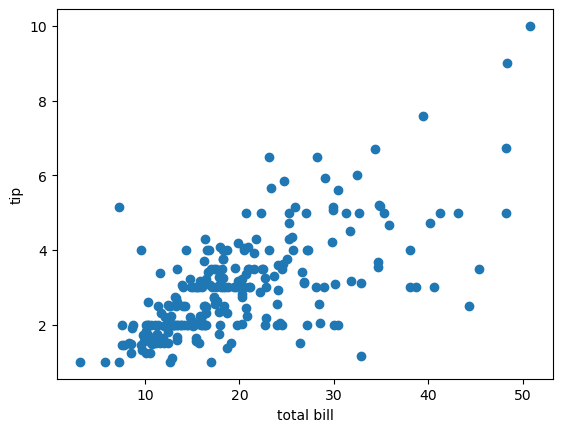

In [58]:
import matplotlib.pyplot as plt

plt.xlabel('total bill')
plt.ylabel('tip')
plt.scatter(tips['total_bill'], tips['tip'])

Ja gibt es

#### 7. (2%) Geben Frauen mehr Trinkgeld als Männer? - Wie hoch ist der Mittelwert der Trinkgelder von Männern und Frauen?

In [59]:
male_average_tip = tips.loc[tips['sex'] == 'Male']['tip'].mean()
female_average_tip = tips.loc[tips['sex'] == 'Female']['tip'].mean()

print("Male average tip: ", male_average_tip)
print("Female average tip: ", female_average_tip)
print("Difference tip: ", male_average_tip - female_average_tip)

Male average tip:  3.0896178343949043
Female average tip:  2.8334482758620685
Difference tip:  0.25616955853283585


In [60]:
# Männer haben im Schnitt jedoch eine höhere Gesamtrechnung und da diese mit dem Trinkgeld zusammenhängt sagt der Durschnitt der Trinkgelder wenig aus.

print("Male average total bill: ", tips.loc[tips['sex'] == 'Male']['total_bill'].mean())
print("Female average total bill: ", tips.loc[tips['sex'] == 'Female']['total_bill'].mean())

Male average total bill:  20.744076433121016
Female average total bill:  18.056896551724133


---

## Aufgabe 2: Data Preprocessing (26%)

Sie erhalten eine csv-Datei mit Daten, die bereinigt werden muss, bevor wir sie für die weitere Analyse verwenden können.

Schauen Sie sich die Datei in einem csv-Viewer Ihrer Wahl an (z.B. die integrierte Lösung in jupyter-lab oder Microsoft Excel).
Was fällt Ihnen auf? 

#### a) (5%) Weniger als die Hälfte der Datei wird korrekt angezeigt. Schreiben Sie ein Bash-Skript, um die Datei in eine richtige csv-Datei zu konvertieren (so dass alle Zeilen richtig angezeigt werden). 

Tipp: Nützliche Befehle sind `sed`, `head` und `tail`.

In [61]:
%%bash
sed -i 's/;/,/g' titanic.csv # lassen wir Zeilen mir leeren Columns?
# -i (replace), s (substitute), g (nicht nur einmal pro Zeile)

#### b) (1%) Laden Sie die Daten in einen Pandas DataFrame

In [62]:
df = pd.read_csv('titanic.csv')
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",Male,NaN,0,0,330877,8.4583,NaN,Q


#### c) (4%) Beachten Sie, dass es in der Spalte "Sex" eine Vielzahl von Möglichkeiten gibt, zwischen männlich und weiblich zu unterscheiden (dieser Datensatz ist auf diese beiden Optionen beschränkt). Finden Sie alle unterschiedlichen Werte, die in dieser Spalte verwendet werden.

In [63]:
df['Sex'].unique()

array(['male', '1', 'female', 'Male', '-1', 'mle', 'Female', 'mal',
       'femal', 'femaale', 'femalle', 'm', 'f', 'femae'], dtype=object)

#### d) (8%) Verwenden Sie Pandas, um alle Einträge in dieser Spalte in "m" bzw. "f" umzuwandeln.  

In [64]:
male_list = ['male', 'Male', '-1', 'mle', 'mal', 'm']

df.loc[df['Sex'].isin(male_list), 'Sex'] = 'm'
df.loc[~df['Sex'].isin(male_list), 'Sex'] = 'f'
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",m,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",f,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",f,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",m,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",m,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",f,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",f,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",m,26.0,0,0,111369,30.0000,C148,C


#### e) (8%) Bereinigen Sie die Spalte "Name". Entfernen Sie `Mr.`, `Mrs.`, `Master`,... Verwenden Sie den in Klammern angegebenen Namen, falls vorhanden.

In [65]:
import re

df['Name'] = df['Name'].replace({'Mr.':'', 'Mrs.':'', 'Master.':'', 'Miss.':'', 'Don.':''}, regex=True)

df['Name'] = df['Name'].apply(lambda st: st[st.find('(')+1:st.find(')')])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Owen Harri",m,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Florence Briggs Thayer,f,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Lain",f,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Lily May Peel,f,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, William Henr",m,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juoza",m,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Margaret Edit",f,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Catherine Helen ""Carrie",f,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Karl Howel",m,26.0,0,0,111369,30.0000,C148,C


## Aufgabe 3: Seaborn Plotting (60%)

#### 1. (0%) Laden Sie den Titanic-Datensatz als Pandas DataFrame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

#### 2. Beantworten Sie die folgenden Fragen mit Hilfe von Diagrammen:

#### a. (10%) Wie ist die Verteilung des Alters der Passagiere?

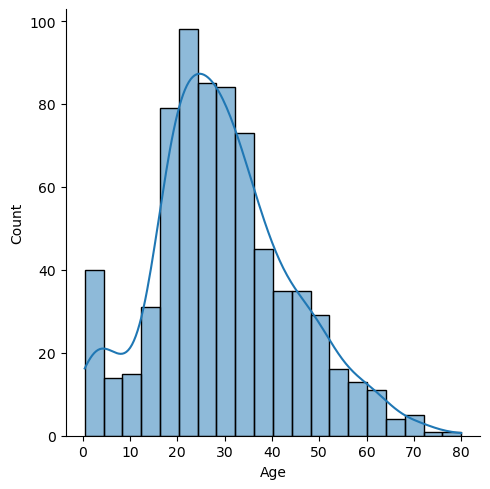

In [2]:
df['Age'].describe()
#from this we can get a basic idea from the mean and std; to be sure just plot it

sns.displot(data=df['Age'], kde=True)

#has a decent bellshape but not quite a normal distribution

#### b. (10%) Waren die Passagiere im Allgemeinen jünger als der Durchschnitt oder älter? Visualisieren Sie Ihre Ergebnisse!

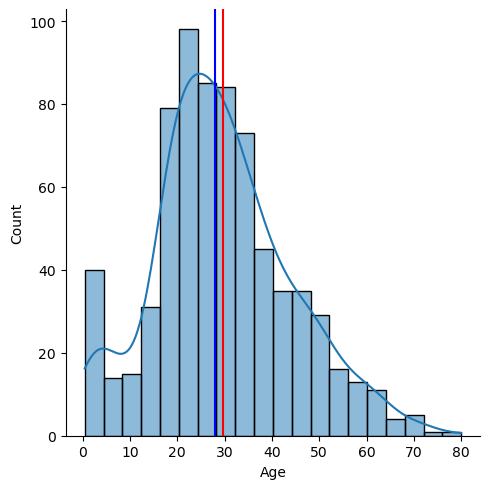

In [25]:
agemean = df['Age'].mean()
agemedian = df['Age'].median()
#layer this ontop the graph we just had

sns.displot(data=df['Age'], kde=True)
plt.axvline(x=agemean, color='red')
plt.axvline(x=agemedian, color='blue')

#here we can see that the median is lower than the mean, which means most passengers were younger than the averge age

#### c. (10%) Ändert sich das Ergebnis in (b) für Männer und Frauen?

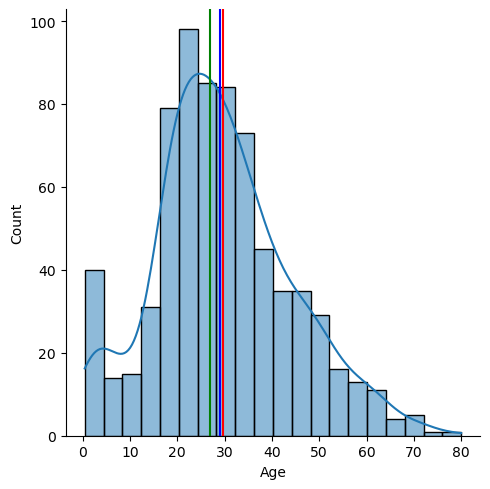

In [34]:
agemean = df['Age'].mean()
agemedian_men = df.loc[df['Sex'] == 'm']['Age'].median()
agemedian_women = df.loc[df['Sex'] == 'f']['Age'].median()
#layer this ontop the graph we just had

sns.displot(data=df['Age'], kde=True)
plt.axvline(x=agemean, color='red')
plt.axvline(x=agemedian_men, color='blue')
plt.axvline(x=agemedian_women, color='green')

#The result stays the same but men are just barely lower than the mean while women differ quite a bit more

#### d. (10%) Welches Geschlecht hatte eine höhere Überlebensrate?

0.18890814558058924 0.7420382165605095


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

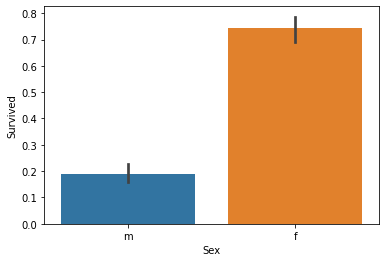

In [9]:
agemedian_men = df.loc[df['Sex'] == 'm']['Survived'].mean()
agemedian_women = df.loc[df['Sex'] == 'f']['Survived'].mean()

print(agemedian_men, agemedian_women)
sns.barplot(data=df, x='Sex', y='Survived')

#women survived way more often than men, only about 19% of me survived while roughly 74% of women survived

#### e. (10%) Wie hoch ist der durchschnittliche Fahrpreis (fare) für jede Klasse? 

This is the average fare for passengers of class 1 : 84.1546875
This is the average fare for passengers of class 2 : 20.662183152173913
This is the average fare for passengers of class 3 : 13.675550101832993


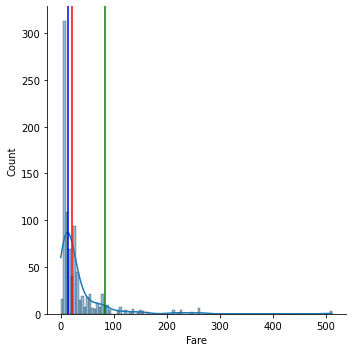

In [5]:
sns.displot(data=df['Fare'], kde=True)

colors=["green", "red", "blue"]
for i in range(1, 4):
    mean = df.loc[df['Pclass'] == i]['Fare'].mean()
    print(f"This is the average fare for passengers of class {i} : {mean}")
    plt.axvline(x=mean, color=colors[i-1])

#zum verschönern bzw falls nur der durschnitt interessiert : X-Skalierung anpassen

#### f. (10%) Welche Fahrkartenklasse hatte eine höhere Überlebensrate?

This is the average survival rate for passengers of class 1 : 0.6296296296296297
This is the average survival rate for passengers of class 2 : 0.47282608695652173
This is the average survival rate for passengers of class 3 : 0.24236252545824846


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

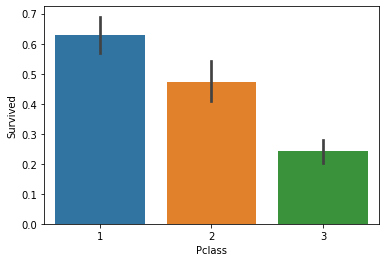

In [13]:
for i in range(1, 4):
    print(f"This is the average survival rate for passengers of class {i} : {df.loc[df['Pclass'] == i]['Survived'].mean()}")

sns.barplot(data=df, x=df['Pclass'], y=df['Survived'])